In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def latticecreate(n):
    lattice = np.random.choice(a=[-1,1],size=(n,n))
    return lattice

In [3]:
def calculateenergy(lattice,n,j,T,Ed,deltaEm):
    demonE=Ed
    steps=[]
    deltaem=deltaEm
    
    l=0
    step=0
    for k in range (0,n*100):
        for l in range (0,n*10):
            x=np.random.randint(0,n)
            y=np.random.randint(0,n)
            
            nb = lattice[(x+1)%n,y] + lattice[x,(y+1)%n] + lattice[(x-1)%n,y] + lattice[x,(y-1)%n]
            
            deltaE=lattice[x,y]*2*nb*j
            if deltaE<=0:
                lattice[x,y]=lattice[x,y]*(-1)
                demonE=demonE+abs(deltaE)
            else:
                if demonE>=deltaE:
                    lattice[x,y]=lattice[x,y]*(-1)
                    demonE=demonE-deltaE
                else:
                    lattice[x,y]=lattice[x,y]  
                    
            deltaem.append(demonE)
            #eps.append(step)
    #lt.plot(steps,deltaem)
    #lt.show()
            step=step+1
    plt.xlabel('Number')
    plt.ylabel('Demon energy')
    plt.hist(deltaem,bins=35)
    plt.show()
    print("No of iterations is",step)
    return lattice,demonE
                

In [4]:
def calceenergy(config,N):
    '''Energy of a given configuration'''
    energy = 0
    for i in range(len(config)):
        for j in range(len(config)):
            S = config[i,j]
            nb = config[(i+1)%N, j] + config[i,(j+1)%N] + config[(i-1)%N, j] + config[i,(j-1)%N]
            energy += -nb*S
    return energy/2

In [5]:
T=1
j=1
n=50
Ed=0.1
deltaEm=[]

Initial total energy of lattice -16.0


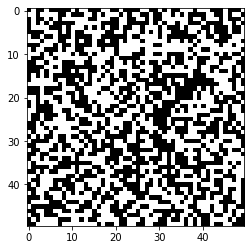

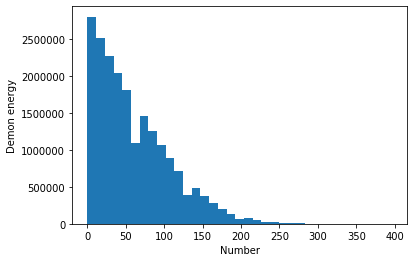

No of iterations is 2500000


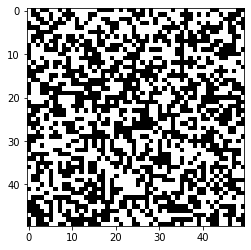

Total energy of lattice after iteration -16.0
Energy pocessed by demon 0.10000000000002274


In [13]:
lattice=latticecreate(n)
print("Initial total energy of lattice",calceenergy(lattice,n))
plt.imshow(lattice, cmap="gray")
plt.show()
newlattice,demon=calculateenergy(lattice,n,j,T,Ed,deltaEm)
plt.imshow(newlattice, cmap="gray")
plt.show()
ef=calceenergy(newlattice,n)
print("Total energy of lattice after iteration",ef)
print("Energy pocessed by demon",demon)

In [ ]:
#This loop can be run for attaining equilibrium, But the time taken will be high
xp=10
while abs(xp)>3:
    tf=calceenergy(newlattice,n)
    newlattice,demon=calculateenergy(newlattice,n,j,T,demon,deltaEm)
    ef=calceenergy(newlattice,n)
    xp=tf-ef
im = plt.imshow(newlattice, cmap="gray")
plt.show()